Valores faltantes por columna:
date                     0
price_bitcoin            0
total_volume_bitcoin     0
market_cap_bitcoin       1
coin_name_bitcoin        0
price_ethereum           0
total_volume_ethereum    0
market_cap_ethereum      1
coin_name_ethereum       0
price_ripple             0
total_volume_ripple      0
market_cap_ripple        0
coin_name_ripple         0
price_litecoin           0
total_volume_litecoin    0
market_cap_litecoin      1
coin_name_litecoin       0
dtype: int64

Valores faltantes después de la corrección:
date                     0
price_bitcoin            0
total_volume_bitcoin     0
market_cap_bitcoin       0
coin_name_bitcoin        0
price_ethereum           0
total_volume_ethereum    0
market_cap_ethereum      0
coin_name_ethereum       0
price_ripple             0
total_volume_ripple      0
market_cap_ripple        0
coin_name_ripple         0
price_litecoin           0
total_volume_litecoin    0
market_cap_litecoin      0
coin_name_litecoin  

C:\Users\User\AppData\Local\Temp\ipykernel_23400\2672933380.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(merged_df[column].mean(), inplace=True)


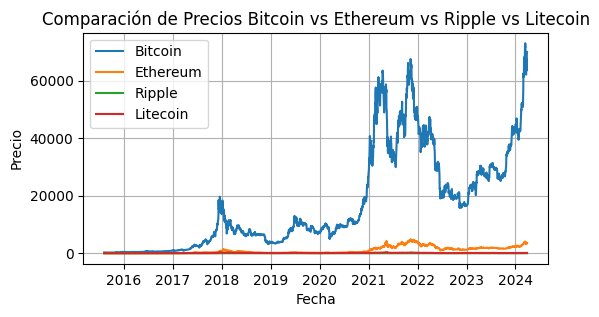

la desviacion estandar menor fue: 0.00373357501234113
La criptomoneda con el mayor valor en los últimos tres meses de 2015 fue Bitcoin con un valor de 464.9989999999999
La moneda más volátil en 2015 fue: Bitcoin con una volatilidad de: 59.30443820293797


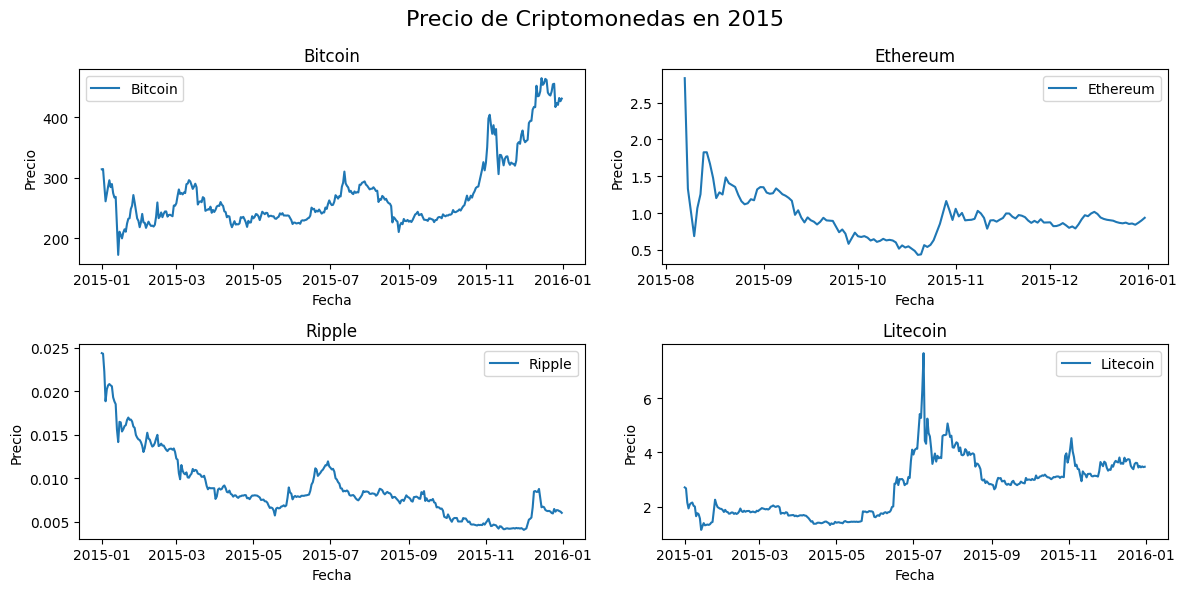

<Figure size 640x480 with 0 Axes>

           date  market_cap_bitcoin  market_cap_ethereum  market_cap_ripple  \
0    2015-08-07        4.015651e+09         0.000000e+00       2.596767e+08   
1    2015-08-08        3.745911e+09         8.033948e+07       2.695966e+08   
2    2015-08-10        3.817350e+09         4.155631e+07       2.790050e+08   
3    2015-08-11        3.909601e+09         6.453901e+07       2.755990e+08   
4    2015-08-12        3.879202e+09         7.601326e+07       2.656680e+08   
...         ...                 ...                  ...                ...   
3146 2024-03-23        1.247366e+12         3.980049e+11       3.349665e+10   
3147 2024-03-24        1.264722e+12         4.027873e+11       3.395527e+10   
3148 2024-03-25        1.323456e+12         4.152273e+11       3.480976e+10   
3149 2024-03-26        1.371797e+12         4.298344e+11       3.505784e+10   
3150 2024-03-27        1.375729e+12         4.306392e+11       3.467627e+10   

      market_cap_litecoin  
0            1.718568e+

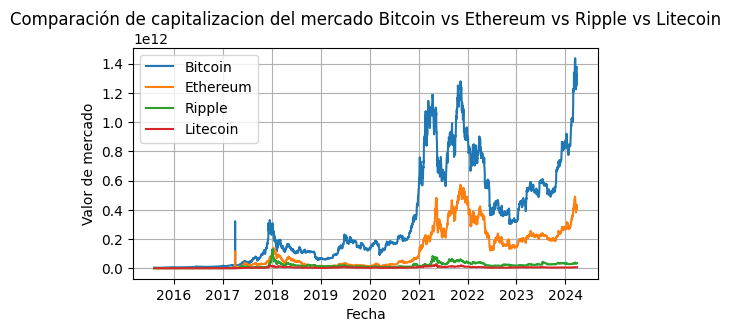

           date  total_volume_bitcoin  total_volume_ethereum  \
0    2015-08-07          4.763746e+07           9.062200e+04   
1    2015-08-08          8.005622e+07           3.680700e+05   
2    2015-08-10          6.078329e+07           4.004641e+05   
3    2015-08-11          6.412489e+07           1.518998e+06   
4    2015-08-12          7.304360e+07           2.073893e+06   
...         ...                   ...                    ...   
3146 2024-03-23          4.243660e+10           2.214306e+10   
3147 2024-03-24          2.548993e+10           1.355470e+10   
3148 2024-03-25          2.809832e+10           1.274760e+10   
3149 2024-03-26          4.482031e+10           1.990059e+10   
3150 2024-03-27          3.625732e+10           2.009472e+10   

      total_volume_ripple  total_volume_litecoin  
0            3.611068e+05           9.033281e+07  
1            6.189923e+05           7.822349e+07  
2            4.678633e+05           6.682885e+07  
3            2.800762e+05  

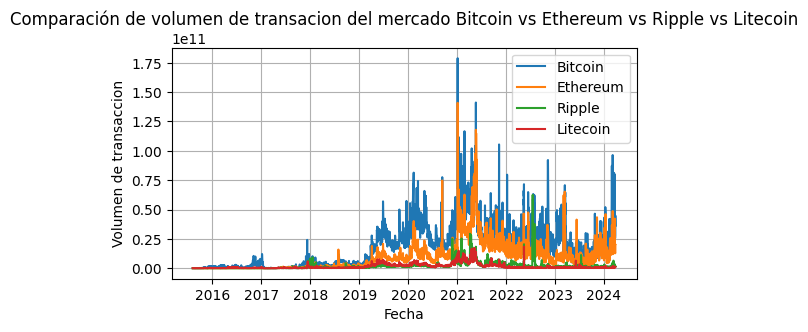

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

# Cargar los archivos CSV en DataFrames
bitcoin_df = pd.read_csv('files/bitcoin.csv')
ethereum_df = pd.read_csv('files/ethereum.csv')
ripple_df = pd.read_csv('files/ripple.csv')
litecoin_df = pd.read_csv('files/litecoin.csv')

# Asegurarse de que las columnas de fecha tengan el mismo formato
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
ethereum_df['date'] = pd.to_datetime(ethereum_df['date'])
ripple_df ['date'] = pd.to_datetime(ripple_df['date'])
litecoin_df ['date'] = pd.to_datetime(litecoin_df['date'])


# Fusionar los DataFrames por la fecha
merged_df = pd.merge(bitcoin_df, ethereum_df, on='date', how='inner', suffixes=('_bitcoin', '_ethereum'))

merged_df = pd.merge(merged_df, ripple_df, on='date', how='inner', suffixes=('', '_ripple'))

merged_df = pd.merge(merged_df, litecoin_df, on='date', how='inner', suffixes=('_ripple', '_litecoin'))

# Identificar valores faltantes o nulos
print("Valores faltantes por columna:")
print(merged_df.isnull().sum())

# Corrección de valores faltantes (ejemplo: rellenar con la media)
for column in merged_df.columns:
    if merged_df[column].isnull().any():
        merged_df[column].fillna(merged_df[column].mean(), inplace=True)

# Verificar que no hay más valores faltantes
print("\nValores faltantes después de la corrección:")
print(merged_df.isnull().sum())


# Imprimir información sobre los tipos de datos
print("\nTipos de datos de las columnas:")
merged_df.dtypes.head


# Comparar el precio
merged_df['Diferencia_Precio'] = merged_df['price_bitcoin'] - merged_df['price_ethereum'] - merged_df['price_ripple'] - merged_df['price_litecoin']

# Mostrar el DataFrame con la comparación
print(merged_df[['date', 'price_bitcoin', 'price_ethereum', 'price_ripple', 'price_litecoin',  'Diferencia_Precio']])


# Graficar los precios
plt.figure(figsize=(6, 3))
plt.plot(merged_df['date'], merged_df['price_bitcoin'], label='Bitcoin')
plt.plot(merged_df['date'], merged_df['price_ethereum'], label='Ethereum')
plt.plot(merged_df['date'], merged_df['price_ripple'], label = 'Ripple')
plt.plot(merged_df['date'], merged_df['price_litecoin'], label = 'Litecoin')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Comparación de Precios Bitcoin vs Ethereum vs Ripple vs Litecoin')
plt.legend()
plt.grid(True)
plt.show()

#Calcular la media de los precios de cierre para cada criptomoneda en 2015
media_bitcoin_2015 = bitcoin_2015['price'].mean()
media_ethereum_2015 = ethereum_2015['price'].mean()
media_ripple_2015 = ripple_2015['price'].mean()
media_litecoin_2015 = litecoin_2015['price'].mean()

# Calcular la desviación estándar de los precios de cierre para cada criptomoneda en 2015
desviacion_bitcoin_2015 = bitcoin_2015['price'].std()
desviacion_ethereum_2015 = ethereum_2015['price'].std()
desviacion_ripple_2015 = ripple_2015['price'].std()
desviacion_litecoin_2015 = litecoin_2015['price'].std()


# Crear un diccionario con las desviaciones estándar
desviaciones = {
    'Bitcoin': desviacion_bitcoin_2015,
    'Ethereum': desviacion_ethereum_2015,
    'Ripple': desviacion_ripple_2015,
    'Litecoin': desviacion_litecoin_2015,
}

# Encontrar la desviación estándar menor
menor_desviacion = min(desviaciones.values())



# Filtrar los datos para los últimos tres meses de 2015
start_date = pd.to_datetime('2015-10-01')
end_date = pd.to_datetime('2015-12-31')

bitcoin_df_filtered = bitcoin_df[(bitcoin_df['date'] >= start_date) & (bitcoin_df['date'] <= end_date)]
ethereum_df_filtered = ethereum_df[(ethereum_df['date'] >= start_date) & (ethereum_df['date'] <= end_date)]
ripple_df_filtered = ripple_df[(ripple_df['date'] >= start_date) & (ripple_df['date'] <= end_date)]
litecoin_df_filtered = litecoin_df[(litecoin_df['date'] >= start_date) & (litecoin_df['date'] <= end_date)]

# Encontrar el valor máximo de cada criptomoneda en el período
max_bitcoin = bitcoin_df_filtered['price'].max()
max_ethereum = ethereum_df_filtered['price'].max()
max_ripple = ripple_df_filtered['price'].max()
max_litecoin = litecoin_df_filtered['price'].max()

# Crear un diccionario con los valores máximos
max_values = {
    'Bitcoin': max_bitcoin,
    'Ethereum': max_ethereum,
    'Ripple': max_ripple,
    'Litecoin': max_litecoin
}

# Encontrar la criptomoneda con el valor máximo
max_crypto = max(max_values, key=max_values.get)




# Calcular la volatilidad (desviación estándar) del precio de cierre para cada criptomoneda en 2015
volatilidad_bitcoin = bitcoin_2015['price'].std()
volatilidad_ethereum = ethereum_2015['price'].std()
volatilidad_ripple = ripple_2015['price'].std()
volatilidad_litecoin = litecoin_2015['price'].std()

# Crear un diccionario con las volatilidades
volatilidades = {
    'Bitcoin': volatilidad_bitcoin,
    'Ethereum': volatilidad_ethereum,
    'Ripple': volatilidad_ripple,
    'Litecoin': volatilidad_litecoin
}

# Encontrar la moneda más volátil
moneda_mas_volatil = max(volatilidades, key=volatilidades.get)
volatilidad_maxima = volatilidades[moneda_mas_volatil]





# Filtrar los datos para el año 2015
bitcoin_2015 = bitcoin_df[(bitcoin_df['date'] >= '2015-01-01') & (bitcoin_df['date'] <= '2015-12-31')]
ethereum_2015 = ethereum_df[(ethereum_df['date'] >= '2015-01-01') & (ethereum_df['date'] <= '2015-12-31')]
ripple_2015 = ripple_df[(ripple_df['date'] >= '2015-01-01') & (ripple_df['date'] <= '2015-12-31')]
litecoin_2015 = litecoin_df[(litecoin_df['date'] >= '2015-01-01') & (litecoin_df['date'] <= '2015-12-31')]



# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Precio de Criptomonedas en 2015', fontsize=16)

# Graficar Bitcoin
axs[0, 0].plot(bitcoin_2015['date'], bitcoin_2015['price'], label='Bitcoin')
axs[0, 0].set_title('Bitcoin')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Precio')
axs[0, 0].legend()

# Graficar Ethereum
axs[0, 1].plot(ethereum_2015['date'], ethereum_2015['price'], label='Ethereum')
axs[0, 1].set_title('Ethereum')
axs[0, 1].set_xlabel('Fecha')
axs[0, 1].set_ylabel('Precio')
axs[0, 1].legend()

# Graficar Ripple
axs[1, 0].plot(ripple_2015['date'], ripple_2015['price'], label='Ripple')
axs[1, 0].set_title('Ripple')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].set_ylabel('Precio')
axs[1, 0].legend()

# Graficar Litecoin
axs[1, 1].plot(litecoin_2015['date'], litecoin_2015['price'], label='Litecoin')
axs[1, 1].set_title('Litecoin')
axs[1, 1].set_xlabel('Fecha')
axs[1, 1].set_ylabel('Precio')
axs[1, 1].legend()

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


 



#comparando market cap
merged_df['market_cap'] = merged_df['market_cap_bitcoin'] - merged_df['market_cap_ethereum'] - merged_df['market_cap_ripple'] - merged_df['market_cap_litecoin']

print(merged_df[['date', 'market_cap_bitcoin', 'market_cap_ethereum', 'market_cap_ripple', 'market_cap_litecoin' ]])
plt.figure(figsize=(6,3))
plt.plot(merged_df['date'], merged_df['market_cap_bitcoin'], label= 'Bitcoin')
plt.plot(merged_df['date'], merged_df['market_cap_ethereum'], label= 'Ethereum')
plt.plot(merged_df['date'], merged_df['market_cap_ripple'], label= 'Ripple')
plt.plot(merged_df['date'], merged_df['market_cap_litecoin'], label ='Litecoin')
plt.xlabel('Fecha')
plt.ylabel('Valor de mercado')
plt.title('Comparación de capitalizacion del mercado Bitcoin vs Ethereum vs Ripple vs Litecoin')
plt.legend()
plt.grid(True)
plt.show()


#comparando total volume
merged_df['total_volume'] = merged_df['total_volume_bitcoin'] - merged_df['total_volume_ethereum'] - merged_df['total_volume_ripple'] - merged_df['total_volume_litecoin']

print(merged_df[['date', 'total_volume_bitcoin', 'total_volume_ethereum', 'total_volume_ripple', 'total_volume_litecoin' ]])

print(f'aqui se puede ver el volumen de transacciones entre estas criptomonedas')
plt.figure(figsize=(6,3))
plt.plot(merged_df['date'], merged_df['total_volume_bitcoin'], label= 'Bitcoin')
plt.plot(merged_df['date'], merged_df['total_volume_ethereum'], label= 'Ethereum')
plt.plot(merged_df['date'], merged_df['total_volume_ripple'], label= 'Ripple')
plt.plot(merged_df['date'], merged_df['total_volume_litecoin'], label ='Litecoin')
plt.xlabel('Fecha')
plt.ylabel('Volumen de transaccion')
plt.title('Comparación de volumen de transacion del mercado Bitcoin vs Ethereum vs Ripple vs Litecoin')
plt.legend()
plt.grid(True)
plt.show()

print("Resumen del Análisis:")
print(f"La criptomoneda más volátil: {moneda_mas_volatil} (Volatilidad: {volatilidad_maxima})")
print(f"La criptomoneda más estable: {min(desviaciones, key=desviaciones.get)}")
print(f"La criptomoneda con mayor valor en Q4 2015: {max_crypto} (Valor: {max_values[max_crypto]})")




